# <span style="color:#3306B0">Forecasting growth in sales and usage of E-bikes</span>
[Based on the [2023 M3 Challenge problem](https://m3challenge.siam.org/resources/archives/2023-year-at-a-glance/2023-problem-remote-work-fad-or-future/) for high school students, and its [winning solutions](https://m3challenge.siam.org/resources/archives/2023-year-at-a-glance/2023-winning-solutions/)]

<P></P>

<DIV ALIGN="CENTER">
<TABLE ALIGN="CENTER" WIDTH="90%" BORDER="0"  CELLSPACING="0"  CELLPADDING="8">
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
        <IMG SRC="./escooters.png" width="95%"></IMG>
    </TD>
    <TD ALIGN="CENTER">
        <IMG SRC="./electric-two-wheeler-market.jpg" width="85%"></IMG>
    </TD>
  </TR>
</TABLE>
</DIV>

Electric vehicles are growing in popularity in many parts of the 
world.  Although electric cars and other larger vehicles have received 
a disproportionate share of media attention, there has also been a 
significant growth in the sales and usage of e-bikes, or electric 
2-wheelers.  In this lab, we develop models to forecast some of 
these trends.  We focus on specific countries for which historical 
sales data are publicly available.

For the purpose of this lab, we consider the following condensed 
form of the original [2023 M3 Challenge problem](https://m3challenge.siam.org/resources/archives/2023-year-at-a-glance/2023-problem-remote-work-fad-or-future/): 


><span style="color:#033600">As the sales of e-bikes have increased, 
government authorities 
in some countries have become interested in understanding whether 
e-bikes are likely to become part of a more sustainable energy 
conservation plan, and help reduce the number of cars on the road.  Some 
governments are even considering tax incentives for people who use 
e-bikes, and some are also looking at ways to make roads 
safer and more convenient for bikers.</span>

><span style="color:#033600">However, before making large-scale 
policy decisions of this type, 
governments are also interested in finding reasonable answers to 
certain foundational questions.  Foremost among these is the 
question of developing reliable forecasts about future trends 
in the use of e-bikes.  The M3 Challenge problem asks students 
to create a model to predict growth in e-bikes sales in the 
United States and/or the United Kingdom, over the next 2 years, 
and also the next 5 years.
</span>

The contest provided students with some optional datasets in an 
Excel file that they were free to use, or they could use any other 
relevant data from other sources.  The Excel file contains 
historical data about e-bike sales and usage patterns, and can 
be found here <https://m3challenge.siam.org/wp-content/uploads/TCP23_data.xlsx>

## <span style="color:#336630">Model development</span> 
[Based on selected winning papers (https://m3challenge.siam.org/resources/archives/2023-year-at-a-glance/2023-winning-solutions/)

In the spirit of best practices, the M3 Challenge Contest recommends 
addressing each of the following components in the course of model 
development: clearly define the problem; state any assumptions 
made; identify the variables used;  construct the math model; 
analyze and assess the solutions.

### 1. Defining the problem

The goal of our problem may be stated as follows:

> We want to create a model to predict growth in e-bike sales in the 
United States and/or the United Kingdom, over the next few years.

In order to achieve this goal we will need to develop a 
modeling strategy based on information or data we can 
find, and by making certain reasonable assumptions.

### 2. Strategy and assumptions

E-bike sales data for recent years in the US and UK appears 
to be available from various online sources.  One way to predict 
short-term future trends is by extrapolating 
historical patterns seen in the recent past.  We note, however, 
that extrapolating past data into the future is risk-prone, 
and does not always produce reliable predictions.  In fact, here 
are the key assumptions we will be making:

 1. We have reliable and accurate data on past 
 e-bike sales in each country of interest.
 2. Reasonable short-term predictions can be made by extrapolating 
 these data a few years into the future.
 3. The factors that influence e-bike purchases in the future will 
 remain similar to those in the past.  (For instance, the 
 government will not suddenly introduce new incentives, or 
 restrictions, on the use of e-bikes.)
 4. The manufacturers of e-bikes will be able to produce enough 
 e-bikes to meet customer demand.


### 3. Our model and the variables used

The Excel file provided with this problem contains very limited 
e-bikes sales data, and student teams often chose to supplement it 
with data from other sources.  For example, here is a 10-year 
dataset on e-bike sales in the US and the UK used by Team 
Number 16573

<IMG SRC="./team16573_bikesales_data.png" width="70%"></IMG>
<DIV ALIGN="CENTER">
E-bike sales in the US and the UK from 2012 to 2022 (in thousands).
</DIV>

It is always a good idea to take a visual look at data.  The 
code segment below reads the data, which is contained in a 
file named `team16573_bikesales_data.csv`, and plots it

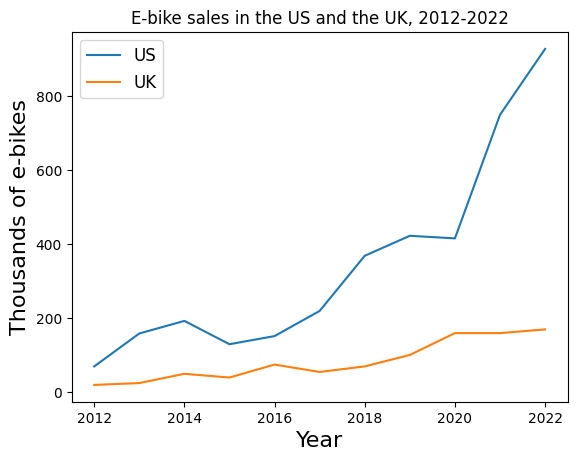

In [11]:
# Our datafile is named: team16573_bikesales_data.csv
# We read & plot the data using pandas & matplotlib, respectively

import matplotlib.pyplot as plt
import pandas as pd

salesdat = pd.read_csv("team16573_bikesales_data.csv")
salesdat.plot(x="Year")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Thousands of e-bikes", fontsize=16)
plt.legend(fontsize=12)
plt.title('E-bike sales in the US and the UK, 2012-2022',fontsize=12)
plt.show()

Team 16573 argued that a logistic growth pattern is commonly 
seen in the public adoption of various other technologies, 
such as smartphones, etc.  Thus, it is reasonable to model 
the growth in e-bike sales in a similar way.  To proceed in 
that direction, let us assume a logistic model of the form
$$
  s(t) = \frac{K}{1 + c e^{-rt}}
$$
where $t$ denotes the year, and $s(t)$ is the number of 
thousands of e-bikes sold that year. $K, c, r$ denote model 
parameters whose values must 
be determined using suitable methods.  Notice that 
$\lim_{t\rightarrow \infty} s(t)=K$, which means that $K$ 
essentially represents an asymptotic maximum possible value 
of e-bikes sold per year in the long-term future.

Our modeling strategy consists of **fitting** a (separate) logistic curve 
to each country's data, and then using the curve to predict future 
sales in that country.  For clarity, we focus on a single 
country, say, the US. Accordingly, 
we want to estimate the best possible 
values of the model parameters $K, c, r$, so that the resulting 
curve gives the closest fit to our US data.  A common way of 
doing this is to seek parameter values that minimize the total 
error in the curve's predictions at the actual data points.  This 
can be done using standard calculus techniques, and there are 
a variety of good, open-source software packages available for 
fitting curves to data.  We will use the `curve_fit` function 
from Python's `scipy.optimize` library for our purpose.  The 
Python code below was almost entirely generated by 
<A HREF="https://chat.openai.com" target="_blank">ChatGPT</A> 
in response to the following prompt

<PRE><span style="color:#630600">
Help me write a Python code to read a csv file containing 3 
columns of variables, named "Year", "US", "UK" (in that order), 
and to fit a logistic model to the US vs Year data.  The form 
of the model I want is $s(t) = \frac{K}{1 + c e^{-rt}}$ where 
$t$ denotes the year, $s$ denotes the "US" variable, $K, c, r$ 
are parameters to be found based on best fit.  The name of my 
csv file is "team16573_bikesales_data.csv"</span></PRE>

Fitted parameters: K = 1.055350e+10, c = 1.560149e+08, r = 0.25983328023323454


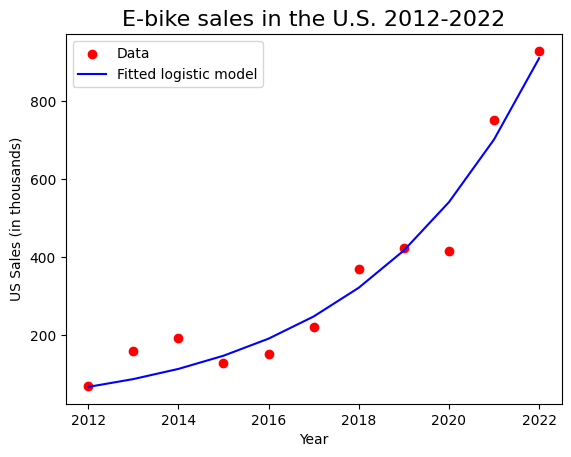

Predicted sales in 2025 = 1982.4599892535266 thousand
Predicted sales in 2028 = 4322.51803674591 thousand


In [11]:
# Step 0: Load the needed libraries & assign nicknames, as convenient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Read the CSV file
data = pd.read_csv('team16573_bikesales_data.csv')

# Step 2: Define the logistic model function
def logistic_model(t, K, c, r):
    return K / (1 + c * np.exp(-r * t))

# Step 3: Extract the data. 
# To avoid numerical overflow, subtract 2012 so that years=0 corresponds to 2012
years = data['Year'].values - 2012
us_sales = data['US'].values

# Step 4: Fit the model
# Initial guess for the parameters K, c, r
initial_guess = [max(us_sales), 1, 0.01]

# Use curve_fit to find the best parameters
params, covariance = curve_fit(logistic_model, years, us_sales, p0=initial_guess)

# Extract the parameters
K, c, r = params

print(f"Fitted parameters: K = {K:.6e}, c = {c:.6e}, r = {r}")

# Step 5: Plot the data and the fitted curve
# Note that we add 2012 back to "years" for easier interpretation.
plt.scatter(years+2012, us_sales, label='Data', color='red')
plt.plot(years+2012, logistic_model(years, *params), label='Fitted logistic model', color='blue')
plt.xlabel('Year')
plt.ylabel('US Sales (in thousands)')
plt.title('E-bike sales in the U.S. 2012-2022', fontsize=16)
plt.legend()
plt.show()

# Use the model to predict sales in the years 2025 and 2028
print(f"Predicted sales in 2025 = {logistic_model(2025-2012,*params)} thousand")
print(f"Predicted sales in 2028 = {logistic_model(2028-2012,*params)} thousand")

### <span style="color:#336630">4. Results and model assessment</span>

According to the results of the curve fit, our model for e-bike 
sales in the US is 

$$
  s(t) = \frac{K}{1 + c e^{-r(t-2012)}}
$$

where $K=10553497878.4, c=156014869.54$, and $r=0.25983$.  Here $t$ 
denotes the calendar year, and $s$ the number of thousands of e-bikes 
sold.  The results also indicate sales predictions for the years 
2025 and 2028 are 1982.46 and 4322.52 thousand, respectively.

An important question from a real-world standpoint is: 
How good is this model?  Can we trust it to make reliable predictions, 
even if only for a few years out?  

First and foremost, since the 
model was tuned to fit a particular dataset, we would 
have to verify that those data accurately and reliably represent 
the underlying population.  Suppose we go ahead and assume 
our data are reliable, what else can we do to assess model 
quality?  One common approach is to carry 
out an analysis of how sensitive the model is to changes in 
the parameter values.  If parameter sensitivity is low, then 
we can be more confident in our predictions, since they 
will not change much if there are small errors in the 
parameters or data values.  In the Python code below, we vary 
each parameter by $\pm 25$% from its estimated value (while 
keeping the other parameters fixed), and observe the effect 
on the model's predictions.

Prediction when K=7.9151e+09:         in 2025 = 1486.8450;         in 2028 = 3241.8885
Prediction when K=1.0553e+10:         in 2025 = 1982.4600;         in 2028 = 4322.5180
Prediction when K=1.3192e+10:         in 2025 = 2478.0750;         in 2028 = 5403.1475


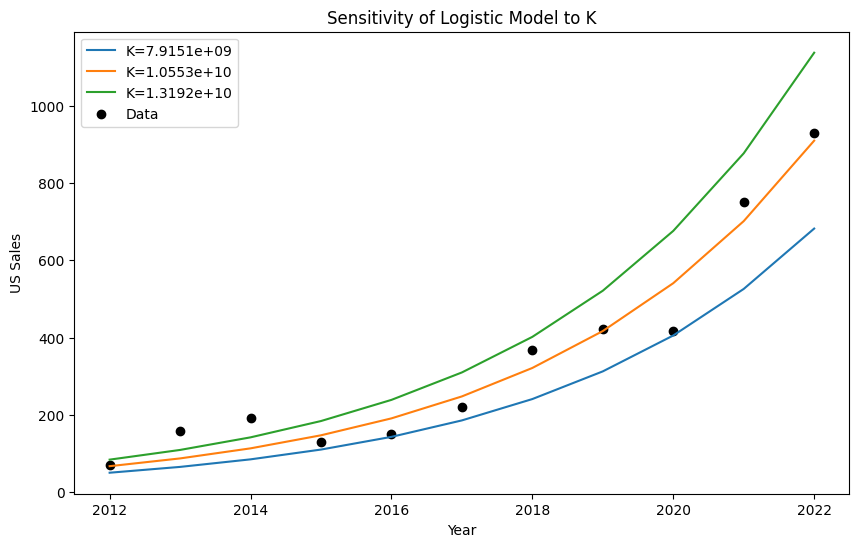

Prediction when c=1.1701e+08:         in 2025 = 2643.2798;         in 2028 = 5763.3566
Prediction when c=1.5601e+08:         in 2025 = 1982.4600;         in 2028 = 4322.5180
Prediction when c=1.9502e+08:         in 2025 = 1585.9681;         in 2028 = 3458.0147


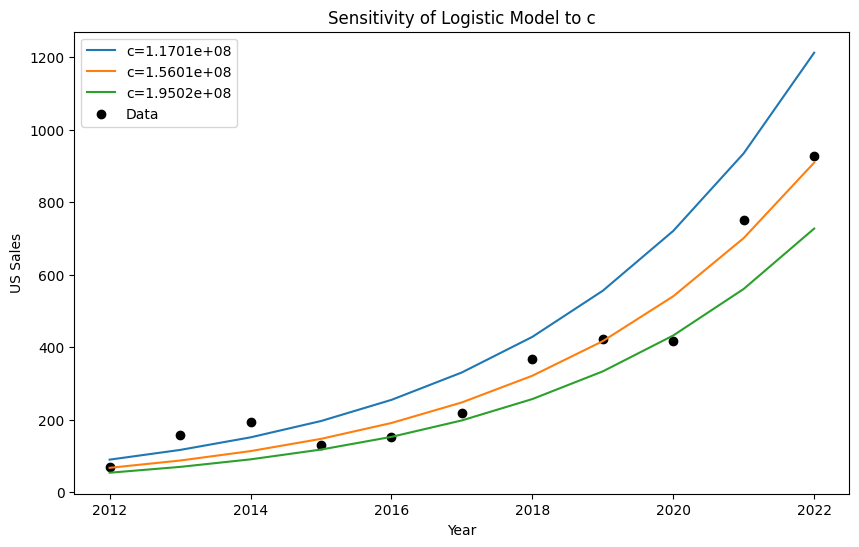

Prediction when r=1.9487e-01:         in 2025 = 852.0419;         in 2028 = 1528.8338
Prediction when r=2.5983e-01:         in 2025 = 1982.4600;         in 2028 = 4322.5180
Prediction when r=3.2479e-01:         in 2025 = 4612.6217;         in 2028 = 12221.1797


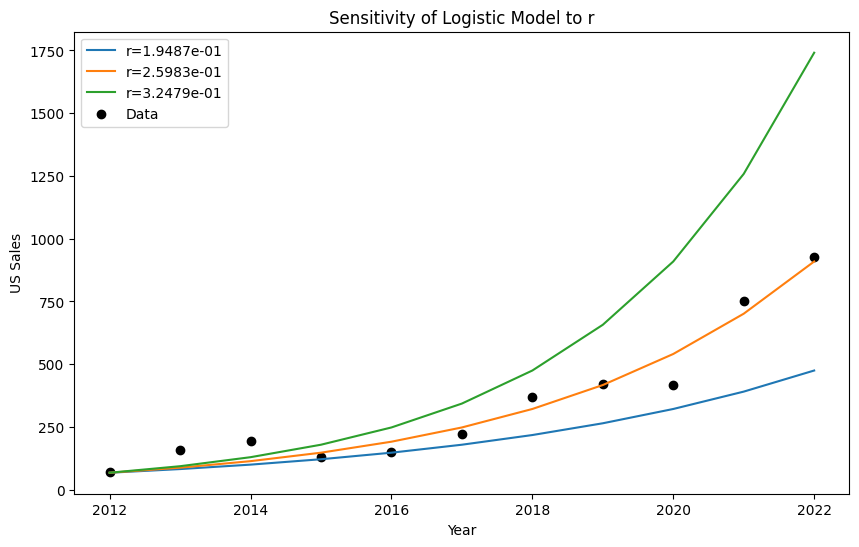

In [24]:
# Load the needed libraries & assign nicknames
import numpy as np
import matplotlib.pyplot as plt

# Logistic model
def logistic_model(t, K, c, r):
    return K / (1 + c * np.exp(-r * t))

# Function to plot sensitivity
def plot_sensitivity(years, us_sales, params, param_name, param_range):
    plt.figure(figsize=(10, 6))
    for param_value in param_range:
        if param_name == 'K':
            K, c, r = param_value, params[1], params[2]
        elif param_name == 'c':
            K, c, r = params[0], param_value, params[2]
        elif param_name == 'r':
            K, c, r = params[0], params[1], param_value
        plt.plot(years+2012, logistic_model(years, K, c, r), label=f'{param_name}={param_value:.4e}')
        print(f"Prediction when {param_name}={param_value:.4e}: \
        in 2025 = {logistic_model(2025-2012,K,c,r):.4f}; \
        in 2028 = {logistic_model(2028-2012,K,c,r):.4f}")
    
    plt.scatter(years+2012, us_sales, label='Data', color='black')
    plt.xlabel('Year')
    plt.ylabel('US Sales')
    plt.title(f'Sensitivity of Logistic Model to {param_name}')
    plt.legend()
    plt.show()

# Define parameter ranges
K_range = np.linspace(params[0] * 0.75, params[0] * 1.25, 3)
c_range = np.linspace(params[1] * 0.75, params[1] * 1.25, 3)
r_range = np.linspace(params[2] * 0.75, params[2] * 1.25, 3)

# Plot sensitivity
plot_sensitivity(years, us_sales, params, 'K', K_range)
plot_sensitivity(years, us_sales, params, 'c', c_range)
plot_sensitivity(years, us_sales, params, 'r', r_range)

### Interpreting the results

The parameter sensitivity graphs show that the model exhibits 
highest sensitivity to $r$, the coefficient of the 
exponent in the denominator.  This is seen not only in the graphs, 
but also in the predictions for the years 2025 and 2028 -- 
their value more than doubles each time $r$ increases by 25%.  In contrast, 
when we increase $K$ or $c$ by 25%, the changes in the predictions 
for 2025 and 2028 are much smaller.  The conclusion is that unless 
we can estimate the value of $r$ very accurately, our model's 
predictions will not be reliable.  In order to estimate $r$ 
accurately, we need reliable input data, and a reliable curve 
fit method.  Although we used a high-quality mathematical 
optimization process for the curve fit, and got a robustly convergent 
solution, the quality of our input dataset is not known.  We 
would, therefore, advise caution in using this model for making 
future predictions, even in the short-term.

## <span style="color:#336630">Practice exercise</span>

One of the winning papers in this contest used an exponential 
model of the form $s(t) = k e^{rt}$, where $s$ and $t$ denote 
the same variables as before ($t=$ year, $s=$ number of thousands 
of e-bikes sold).  The model parameters $k, r$ must be determined 
by fitting it to the data.  Carry out the curve fit and predict 
e-bike sales in the US and the UK for the years 2025 and 2028.  Perform a parameter sensitivity analysis and discuss your 
findings.